# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [ ]:
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data from its location on google drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Projects/Food Hub/foodhub_order.csv')
df = data.copy()
# return the first 5 rows to view the data and get a sense for layout and the data given
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# To check the shape of the dataset
df.shape

(1898, 9)

#### Observations:
This dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 5 numerical columns and 4 object columns. Rating column is an object which we will leave as is so it is categorical

All columns have 1898 non-null values, we interperet that there are no missing values but will continue to check.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Verify no null values in any columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

#### Observations:
There are no null values. This corresponds with the .info() command which listed all columns as having 1898 non-null values.

Also, there are no duplicated rows.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# describe() will provide a statisical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The minumum time to prepare the food is 20 minutes, the average(mean) time to prepare the food is about 27 minutes, which is pretty close to the median time, and the maximum food preparation time in this dataset is 35 minutes.

The min is 3 minutes below the 25th quartile and the max is 4 minutes greater than the 75th quartile. This tells us there probably is not any far outliers and all the food prep time values are probably good data points. Will further anaylize with boxplots.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# value_counts of the 'rating' column
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
df['rating'].value_counts(normalize=True)*100

Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: rating, dtype: float64

#### Observations:
There are 736 orders in which the rating was not given. This equates to about 39 percent of the orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Numeric Columns Analysis
We will analyze the numeric columns of 
- **order_id**
- **customer_id**
- **cost_of_the_order**
- **food_peparation_time**
- **delivery_time**

And the categorical columns of
- **restaurant_name**
- **cuisine_type**
- **day_of_the_week**
- **rating**

#### Order ID

In [ ]:
# check for duplicated order ids
df['order_id'].duplicated().sum()

0

In [ ]:
df['order_id'].nunique()
# number of order ids match total number of rows, no duplicates.

1898

#### Customer ID


In [ ]:
# How many customer ids have placed orders?
print(df['customer_id'].nunique(dropna=False))
print(df['customer_id'].nunique())
# there are no nan values in customer ID, there are 1200 actual customer ids

1200
1200


In [ ]:
# Extract the number of times each customer id has made an order
cust_freq = pd.DataFrame(df['customer_id'].value_counts()).reset_index()
cust_freq.rename(columns = {'index':'customer_id', 'customer_id':'num_of_visits'},inplace=True)

cust_freq.head(20)

,customer_id,num_of_visits
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7
5,82041,7
6,65009,7
7,276192,7
8,97079,6
9,97991,6


In [ ]:
cust_freq.num_of_visits.value_counts()

1     784
2     267
3      83
4      33
5      19
6       6
7       4
13      1
10      1
9       1
8       1
Name: num_of_visits, dtype: int64

Text(0.5, 1.0, 'Customer Use')

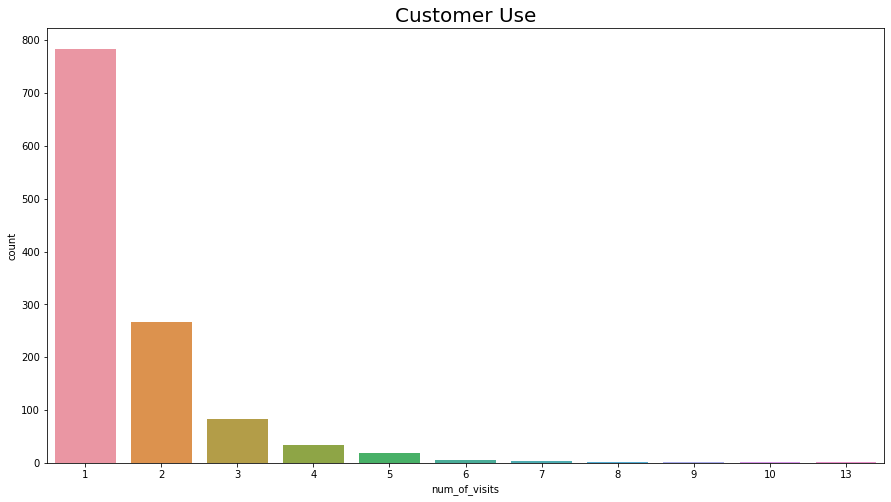

In [ ]:
# create a bar graph depicting customer use frequency
plt.figure(figsize=(15,8))
sns.countplot(data=cust_freq, x='num_of_visits');
plt.title('Customer Use', fontsize=20)


Text(0.5, 1.0, 'Customer Use')

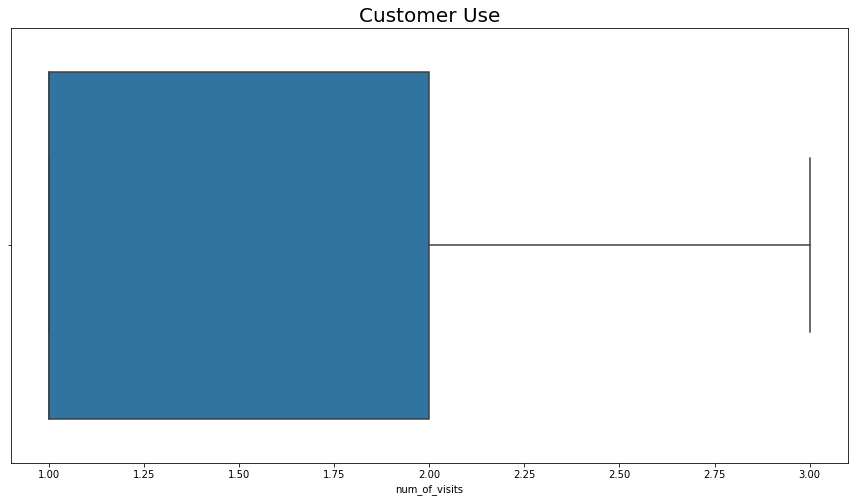

In [ ]:
# boxplot to visualize number of times customers use the service, outliers are off for better granularity of majority
plt.figure(figsize=(15,8))
sns.boxplot(data=cust_freq, x='num_of_visits', showfliers=False)
plt.title('Customer Use', fontsize=20)

####Cost of the order

Text(0.5, 1.0, 'Order Cost Distribution')

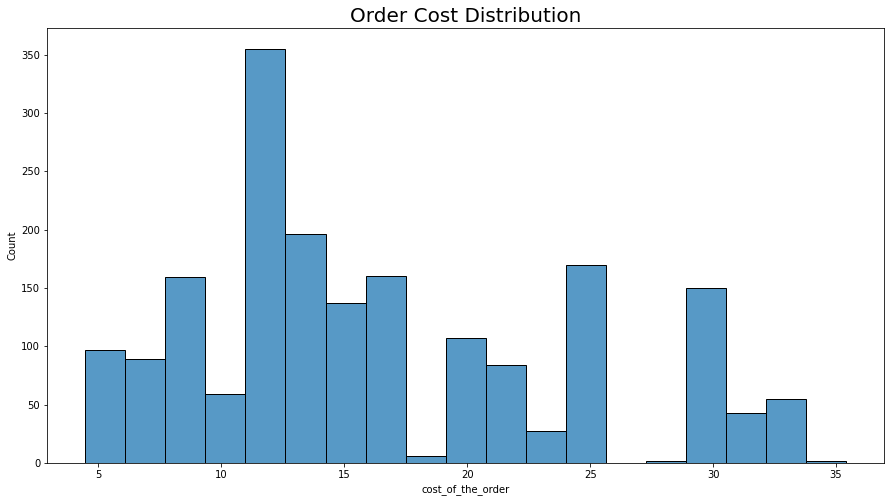

In [ ]:
# Check the distribution of order costs
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='cost_of_the_order');
plt.title('Order Cost Distribution', fontsize=20)

Text(0.5, 1.0, 'Order Cost Distribution')

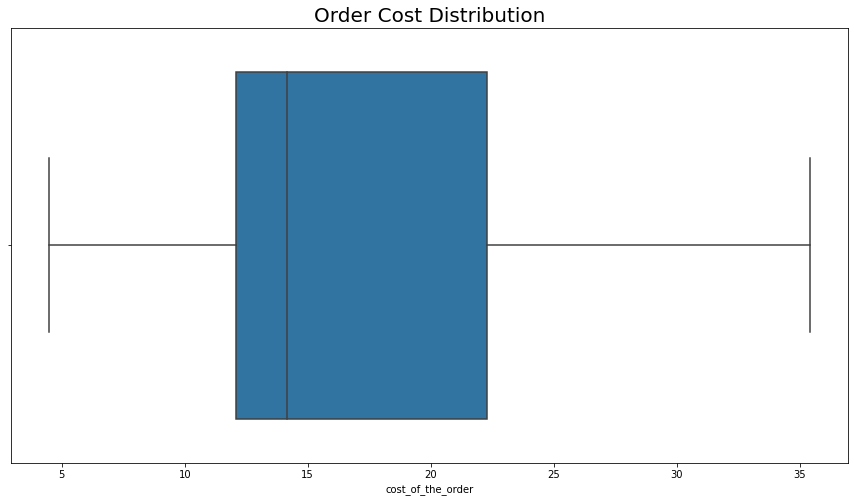

In [ ]:
# boxplot of the order cost distribution
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='cost_of_the_order');
plt.title('Order Cost Distribution', fontsize=20)
# note the median is quite close to the 25th percentile

####Food Preparation Time

Text(0.5, 1.0, 'Food Preparation Time')

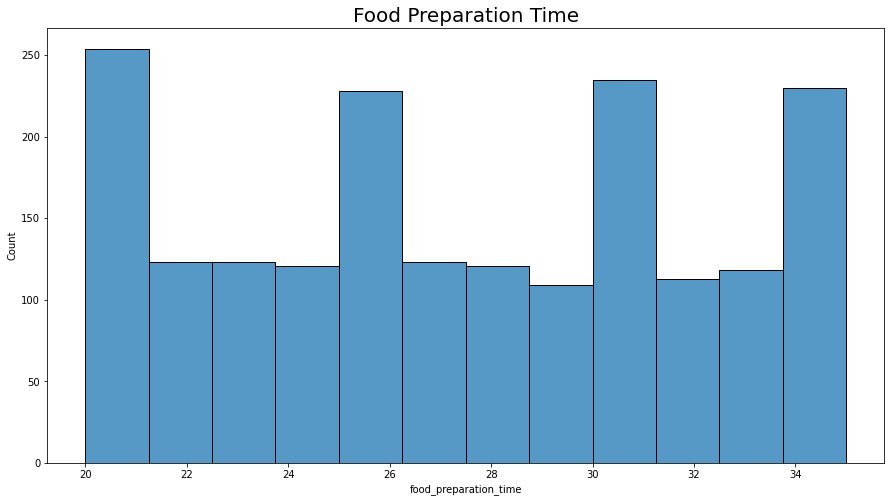

In [ ]:
# Check the distribution of food preparation time
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='food_preparation_time');
plt.title('Food Preparation Time', fontsize=20)

Text(0.5, 1.0, 'Food Preparation Time')

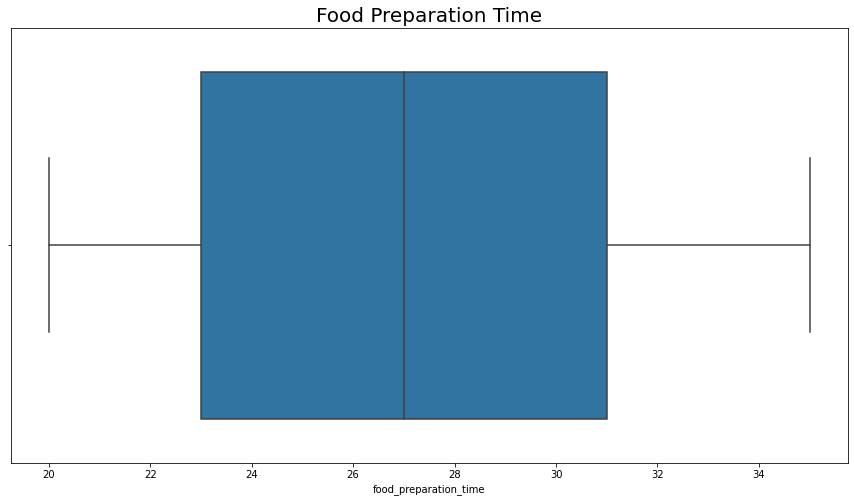

In [ ]:
# boxplot to analyize food prep time distribution
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='food_preparation_time');
plt.title('Food Preparation Time', fontsize=20)

#### Delivery Time

Text(0.5, 1.0, 'Delivery Time')

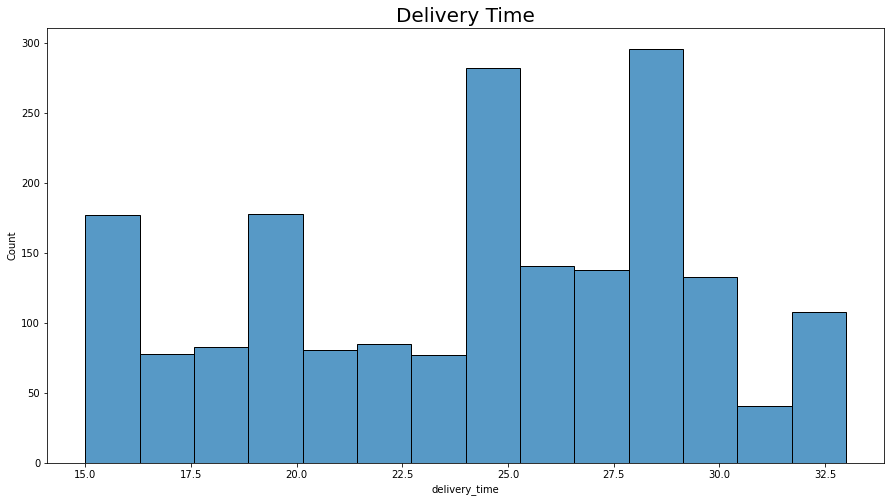

In [ ]:
# check distribution of delivery times
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='delivery_time');
plt.title('Delivery Time', fontsize=20)

Text(0.5, 1.0, 'Delivery Time')

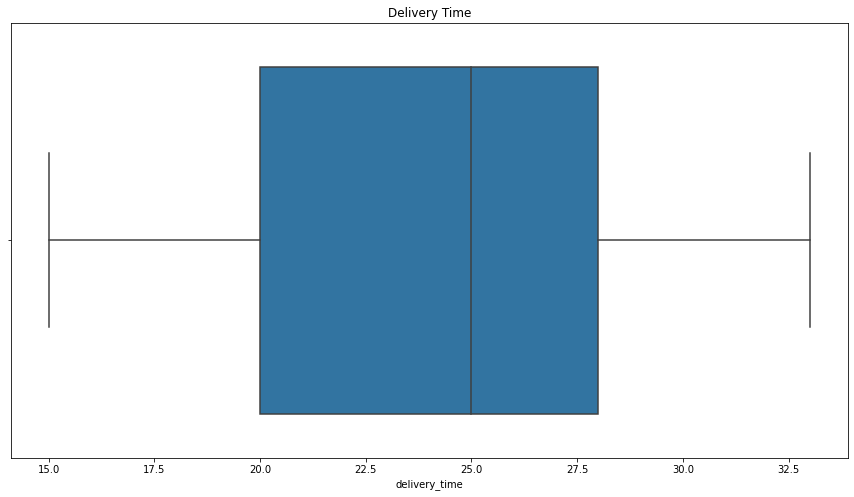

In [ ]:
# boxplot to analyze delivery time distribution
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='delivery_time')
plt.title('Delivery Time')

#### Restaurant Name

In [ ]:
# determine how many restaurants use the service
df['restaurant_name'].nunique()

178

In [ ]:
# determine popularity of restaurants by counting each time a restaruant name appears
df.restaurant_name.value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Cuisine Type

In [ ]:
# show the different cuisine type options
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
# number of different cuisine type options
df['cuisine_type'].nunique()

14

Text(0.5, 1.0, 'Cuisine Type')

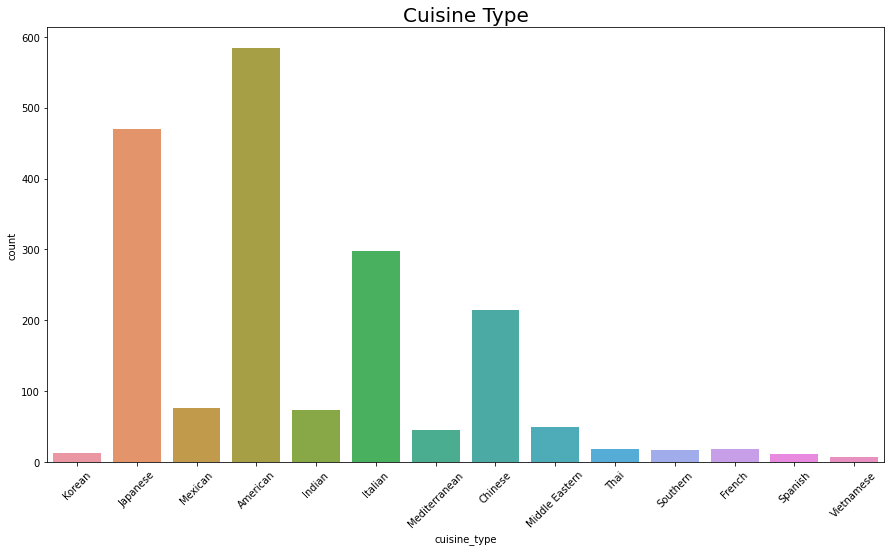

In [ ]:
# evaluate popularity by cuisine type
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation=45)
plt.title('Cuisine Type', fontsize=20)

#### Weekday vs Weekend

In [ ]:
# find the number of weekend orders and weekday orders
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
# find percent of orders by weekend vs weekday
df['day_of_the_week'].value_counts(normalize = True)*100

Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64

Text(0.5, 1.0, 'Weekend vs Weekday')

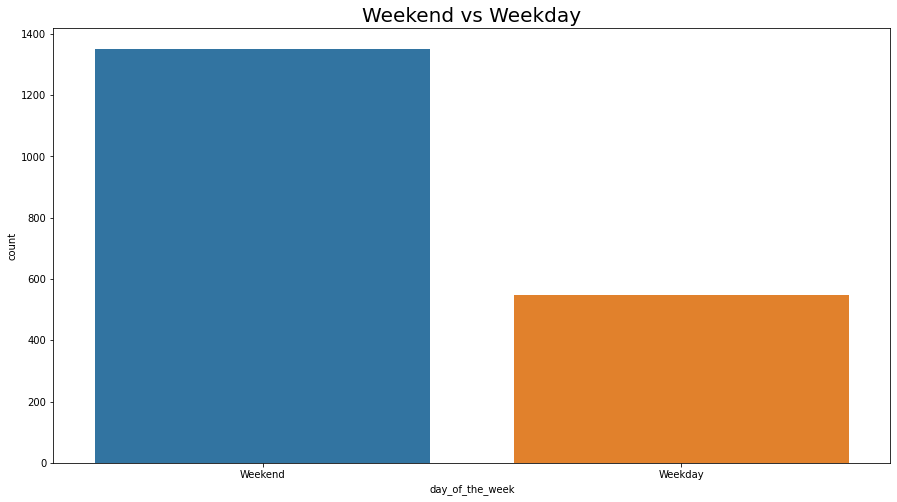

In [ ]:
# visualize weekend vs weekday order volume
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='day_of_the_week');
plt.title('Weekend vs Weekday', fontsize=20)

#### Rating

In [ ]:
# list all available rating options in the dataframe
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# count number of each rating, four categories, 3,4,5, and Not given
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# determine percent of orders with each rating category
df['rating'].value_counts(normalize=True)*100

Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: rating, dtype: float64

In [ ]:
# textualize the ratings percentage information
print('The ratings percentages are as follows:\n',
      '5 stars:', round(df['rating'].value_counts()['5']/df.shape[0]*100), 'percent\n',
      '4 stars:', round(df['rating'].value_counts()['4']/df.shape[0]*100), 'percent\n',
      '3 stars:', round(df['rating'].value_counts()['3']/df.shape[0]*100), 'percent\n', 
      'Not rated:', round(df['rating'].value_counts()['Not given']/df.shape[0]*100), 'percent')

The ratings percentages are as follows:
 5 stars: 31 percent
 4 stars: 20 percent
 3 stars: 10 percent
 Not rated: 39 percent


In [ ]:
# Percent of rated orders by rating
print('The ratings percentages among only the rated orders are as follows:\n',
      '5 stars:', round(df['rating'].value_counts()['5']/1162*100), 'percent\n',
      '4 stars:', round(df['rating'].value_counts()['4']/1162*100), 'percent\n',
      '3 stars:', round(df['rating'].value_counts()['3']/1162*100), 'percent\n',)


The ratings percentages among only the rated orders are as follows:
 5 stars: 51 percent
 4 stars: 33 percent
 3 stars: 16 percent



Text(0.5, 1.0, 'Ratings')

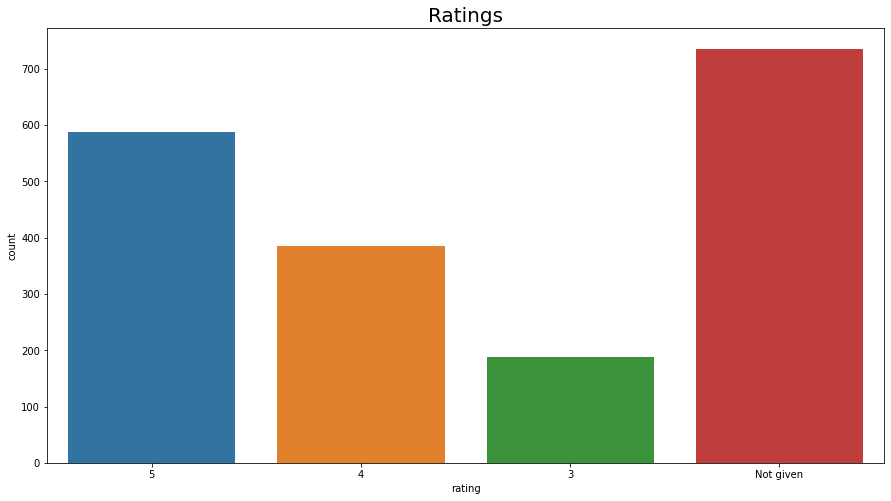

In [ ]:
# Visualize ratings by category, including not rated
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='rating', order=['5','4','3','Not given']);
plt.title('Ratings', fontsize=20)

Text(0.5, 1.0, 'Ratings')

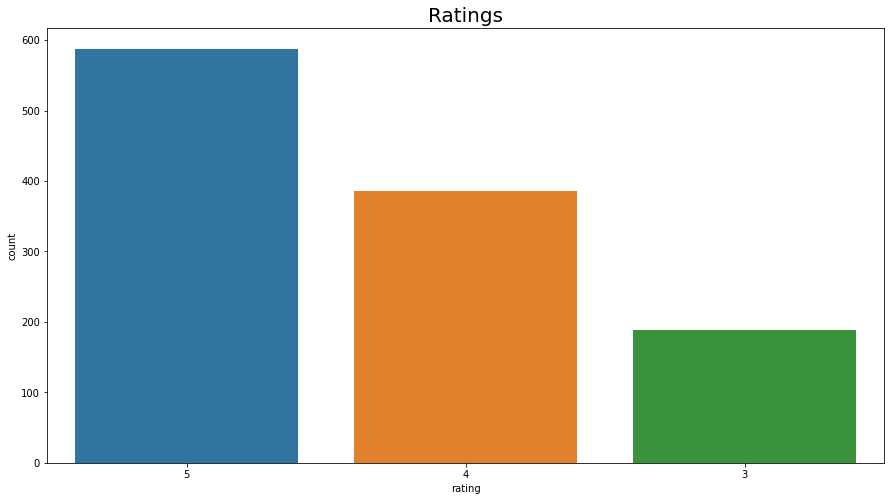

In [ ]:
# visualize ratings excluding not rated to compare ratings actually given
plt.figure(figsize=(15,8))
sns.countplot(data=df[df['rating']!='Not given'], x='rating', order=['5','4','3']);
plt.title('Ratings', fontsize=20)

#### Observations:
**order_id** There are no duplicate order ids.

**customer_id** There are 1200 unique customers by customer id.

Approx. 65 percent of customers only order food one time. There are a fair amount of customers ordering 2 times, approx 14 percent, and very few ordring more than 5 times.

The boxplot, with outliers turned off, shows us that 75 percent of customers are using the app 2 or less times.

This data is highly right-skewed. 784 one-time users, 267 two-time users, 83 three-time users, and the number continue to taper off as repeat transactions increases.

We should investigate why so many customers are not returning to the service. We should find ways to improve customer retention/usage.

**cost_of_the_order** The distribution of order costs is not normally distributed.  There is one mode at approx. 11-12 dollars with multiple second tier modes roughly the same.

The highest concentration of orders are between 11-12 dollars with approx. 350 orders in this range. 

The second tier of orders have roughly the same order count and are distributed around 8 dollars, 14-17 dollars, 25 dollars, and 30 dollars.

The boxplot shows that orders range from about 5 dollars to about 35 dollars.  Half of the orders cost between about 12 dollars and 23 dollars.  The median price is about 14 dollars which is much closer to the 25th quartile and far from the 75th quartile. There is a slight right skew. There are no outliers.


**food_preparation_time** The distribution of food preparation time is not normally distributed. The data is multi-modal with roughly equal modes at 20 minutes, 26 minutes, 31 minutes, and 35 minutes.

The boxplot shows us that orders take between 20 and 35 minutes to prepare with half of the orders taking between 23 minutes and 31 minutes.  The median time to prepare is 27 minutes.

**delivery_time** The distribution is not normal, there are multiple modes.

Overall, the range of delivery times is between 15 minutes and 33 minutes, there are no outliers.  

The median delivery time is 25 minutes which is close to the mean of 24 minutes. 50 percent of the deliveries take between 20 and 28 minutes.

**restaurant_name** There are 178 different restaurant names.

**cuisine_type** There are 14 cuisine types with American and Japenese, being the most popular with Italian and Chinese following. 

The number one cuisine type, American, has twice the weekend orders as the number 3 type, Italian, and 8 times the number of weekend orders as the number 5 type, Indian.

American food by itself makes up 30 percent of the weekend orders.

American and Japanese account for about 750 of the 1351 weekend orders, or about 56 percent.

**day_of_the_week** 71 percent of the orders are made on the weekend.

**rating** The ratings percentages are as follows:

 5 stars: 31 percent

 4 stars: 20 percent

 3 stars: 10 percent
 
 No Rating Given: 39 percent

 **Of the rated orders:**

5 stars: 51 percent

 4 stars: 33 percent
 
 3 stars: 16 percent


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Value counts for Restaurant Name
# Total count of the top 5 and percentage top 5 is of the total orders
df['restaurant_name'].value_counts().head(5)
print('The top five restaurants in terms of number of orders recived are:\n', df['restaurant_name'].value_counts().head(5), sep='')
print('\n',df['restaurant_name'].value_counts().head(5).sum(), sep='')
print(df['restaurant_name'].value_counts().head(5).sum()/df['restaurant_name'].value_counts().sum())

The top five restaurants in terms of number of orders recived are:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

634
0.3340358271865121


#### Observations:
The top 5 restaurants in terms of number of orders recieved are:
- Shake Shack
- The Meatball Shop
- Blue Ribbon Sushi
- Blue Ribbon Fried Chicken
- Parm

Shake Shack has a considerable lead with almost double the number two restaurant and almost 4 times the orders as the number 5 restaurant.

Together, these five restaurants account for 33 percent of the orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

####Comparison of Weekend vs Weekday
This is good to compare weekend vs weekday by cuisine type, but below is a better chart to answer the question regarding cuisine types on the weekend

Text(0.5, 1.0, 'Weekend vs Weekday')

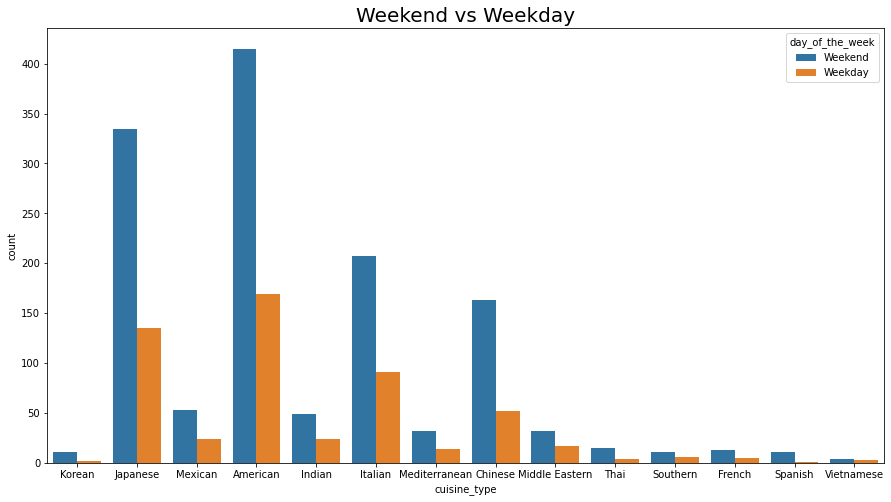

In [ ]:
# Countplot split comparing cuisine types by Weekday vs Weekend
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week');
plt.title('Weekend vs Weekday', fontsize=20)

#### Weekend orders by Cuisine Type

Text(0.5, 1.0, 'Cuisine Popularity on Weekends')

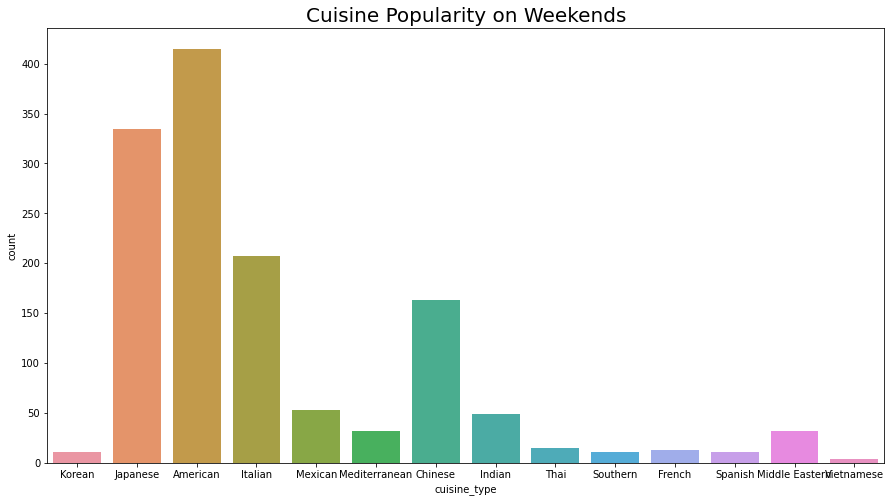

In [ ]:
# Separated out only the orders placed on weekends and broken down into cuisine type
plt.figure(figsize=(15,8))
sns.countplot(data=df[df['day_of_the_week']=='Weekend'], x='cuisine_type');
plt.title('Cuisine Popularity on Weekends', fontsize=20)

#sns.countplot(data=data[data['Ad Supported']=='Yes'], x='Category', hue='Paid/Free')

In [ ]:
# number of Weekend orders vs Weekday orders
df['day_of_the_week'].value_counts(normalize=True)*100

Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64

#### Observations:
American food is the most popular on the weekends, followed by Japanese, Italian, and Chinese.  

The remaining cuisine types are all realativly simliar in number of orders.

Overall, there are more than twice as many weekend orders than weekday orders.

The top four cuisine types each have at least three times the number of orders of any of the remaining 10 types.

The number one cuisine type, American, has twice the weekend orders as the number 3 type, Italian, and 8 times the number of weekend orders as the number 5 type, Indian.

American food by itself makes up 30 percent of the weekend orders.

American and Japanese account for about 750 of the 1351 weekend orders, or about 56 percent.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# count the number of orders greater than 20 dollars
pcost = df['cost_of_the_order'][df['cost_of_the_order']>20].count()/df['cost_of_the_order'].count()*100
print(int(pcost), 'percent of the orders cost more than 20 dollars.')


29 percent of the orders cost more than 20 dollars.


Text(0.5, 1.0, 'Orders Greater Than 20 Dollars')

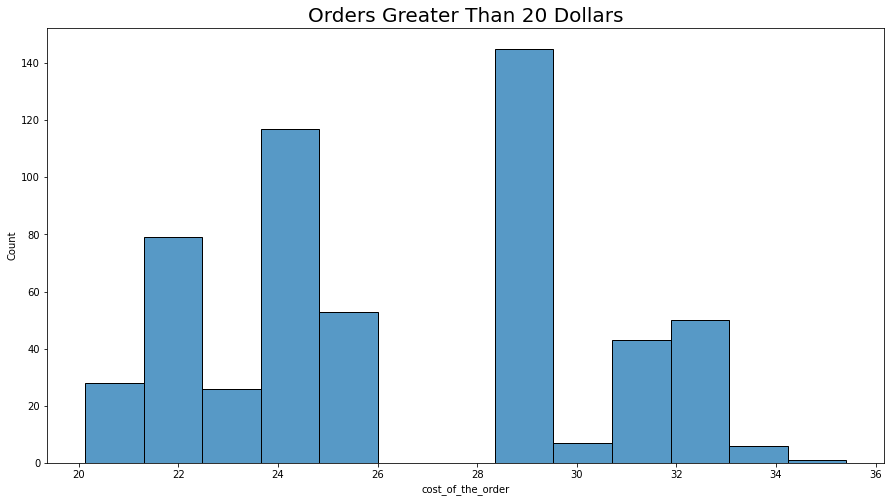

In [ ]:
# Display the distribution of orders with cost greater than 20 dollars
plt.figure(figsize=(15,8))
sns.histplot(data=df[df['cost_of_the_order']>20], x='cost_of_the_order');
plt.title('Orders Greater Than 20 Dollars', fontsize=20)

#### Observations:
29 Percent of the orders cost more than 20 dollars. 

Further analysis via the histplot above shows there is a cluster from 20 to 26 dollars and a second cluster between 28 dollars and 35 dollars.

The highest concentration of cost is at 29 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Determine overall mean delivery time.
print(df['delivery_time'].mean(),'\n')
print('The mean delivery time for all orders is', int(df['delivery_time'].mean()), 'minutes.\n')


24.161749209694417 

The mean delivery time for all orders is 24 minutes.



#### Observations:
The mean delivery time is 24 minutes. 


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# customer id by value counts
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [ ]:
# determine how many customers used the service more than once
rep_custs = df['customer_id'].value_counts()
rep_custs = rep_custs[rep_custs>1]


one_time_custs = df['customer_id'].value_counts()
one_time_custs = one_time_custs[one_time_custs==1]
p = len(one_time_custs)
n  = len(rep_custs)/(len(one_time_custs) + len(rep_custs))
print('Of the',len(one_time_custs) + len(rep_custs), 'customers,', len(rep_custs),'or',round(n*100), 
      'percent of customers have used the service more than one time')
print('This', round(n*100),'percent of customers accounts for',round((df.shape[0]-p)/df.shape[0]*100), 'percent of the orders')

Of the 1200 customers, 416 or 35 percent of customers have used the service more than one time
This 35 percent of customers accounts for 59 percent of the orders


#### Observations:
The top three customers by order numbers are:
- Customer 52832 with 13 orders
- Customer 47440 with 10 orders
- Customer 83287 with 9 orders

Additionally, 35 percent of customers are repeat customers and they account for 59 percent of the orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Numerical column analysis

In [ ]:
# create a column total_time combining prep and delivery to asses total wait time for customers
df['total_time']=df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [ ]:

# copy to a new dataframe with only the rows with a rating
df_rated = df[df['rating']!='Not given'].copy()
# change rating to an integer so we can calculate the mean
df_rated['rating'] = df_rated['rating'].astype(int)
print(df_rated.shape)
# all rating 'Not given' rows removed, 1162 remain



(1162, 10)


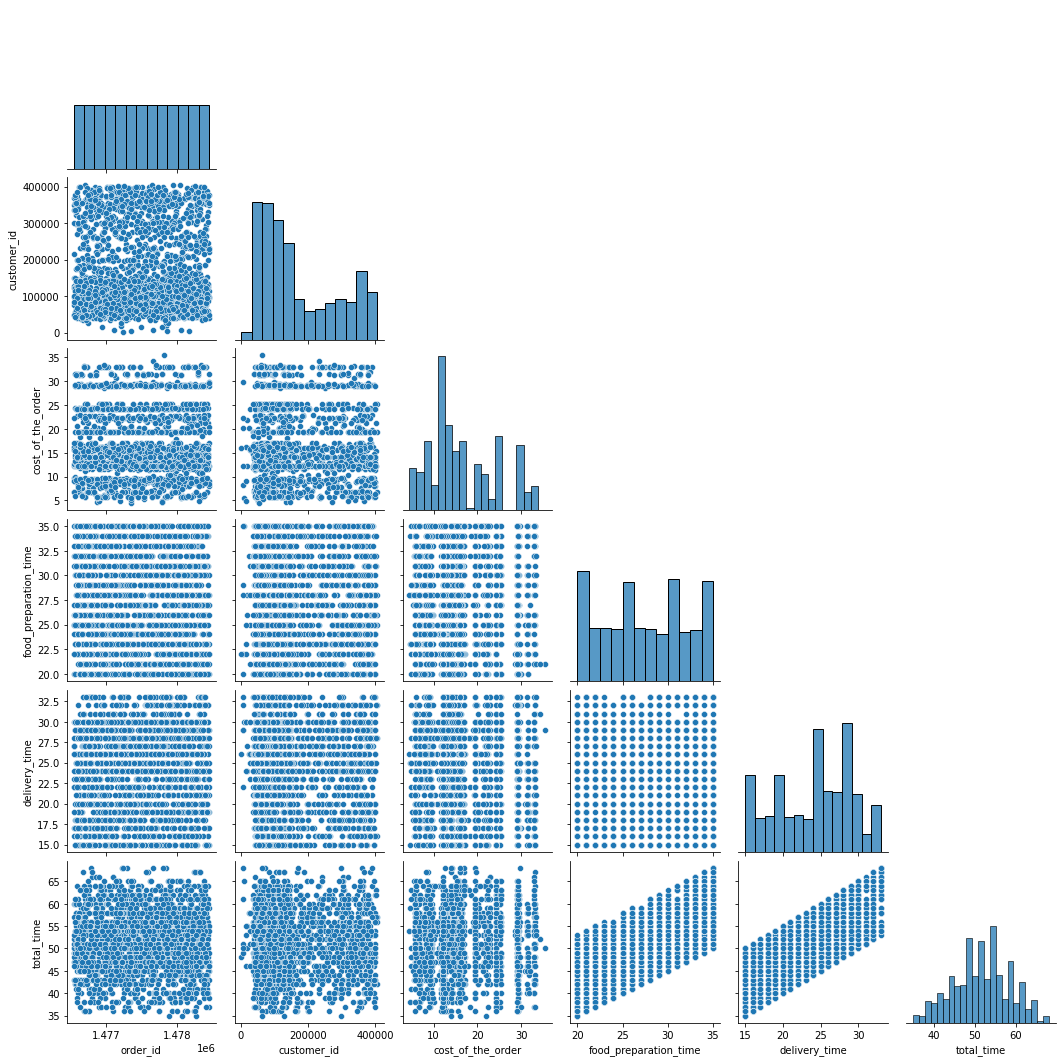

In [ ]:
# pairplot to quickly compare all numerical fields
sns.pairplot(data=df, corner=True);

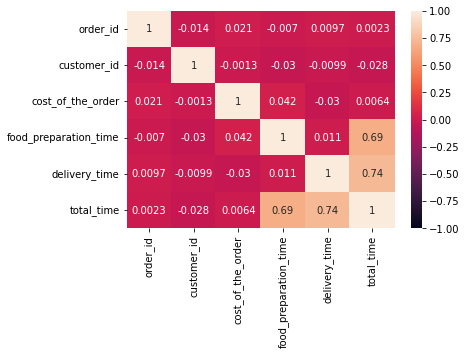

In [ ]:
# heatmap to see correlation, no real correlation between any numerical fields
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1)

#### Cuisine Type and Cost of the Order

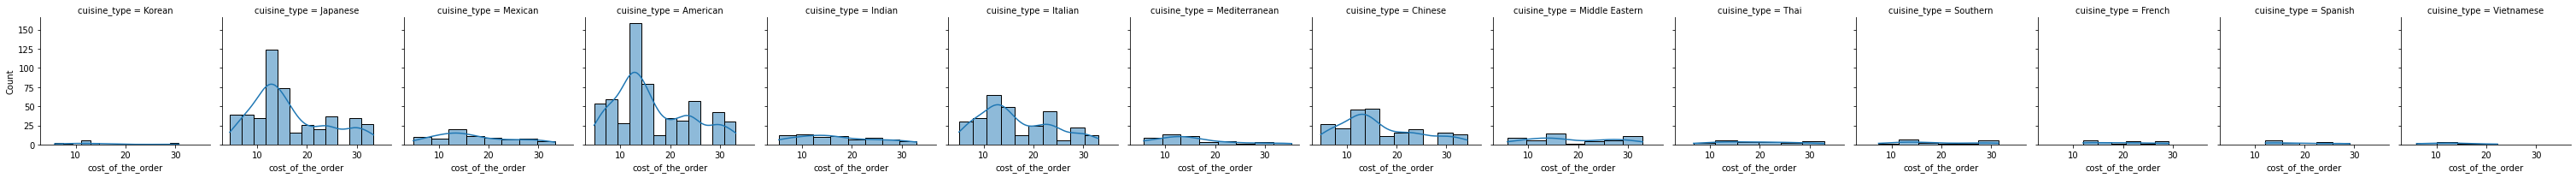

In [ ]:
cp= sns.FacetGrid(df,col='cuisine_type')
cp.map(sns.histplot,'cost_of_the_order', kde=True)


#g = sns.FacetGrid(df, col='body_style')
#g.map(sns.histplot,'price', kde=True);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

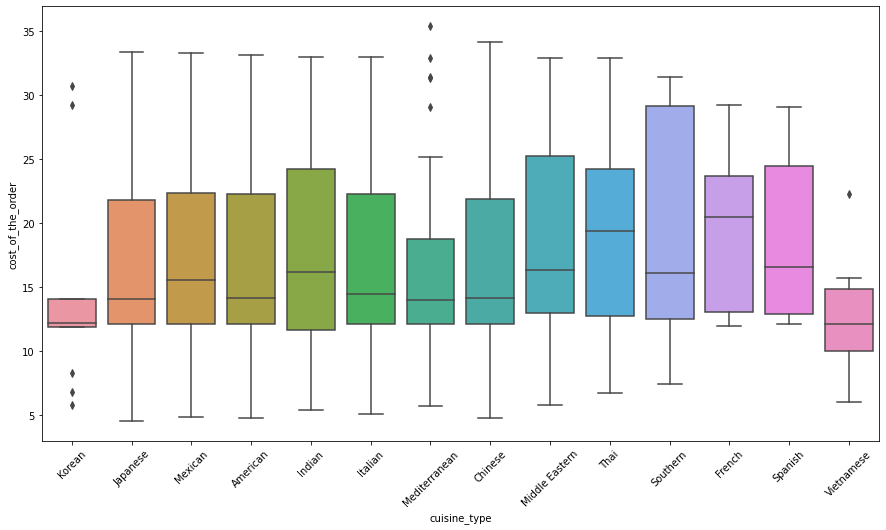

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

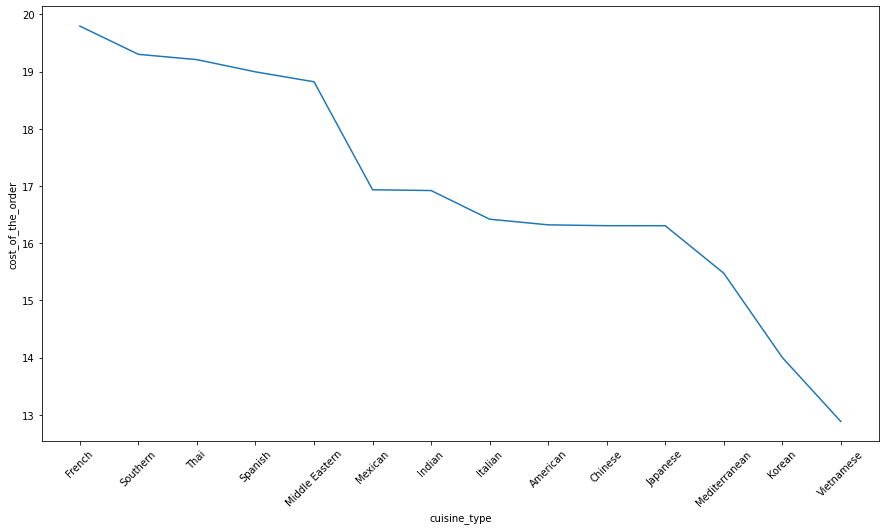

In [ ]:
# determing order cost averages by cuisine type for all orders
av_cui_cost = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.lineplot(data=av_cui_cost)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

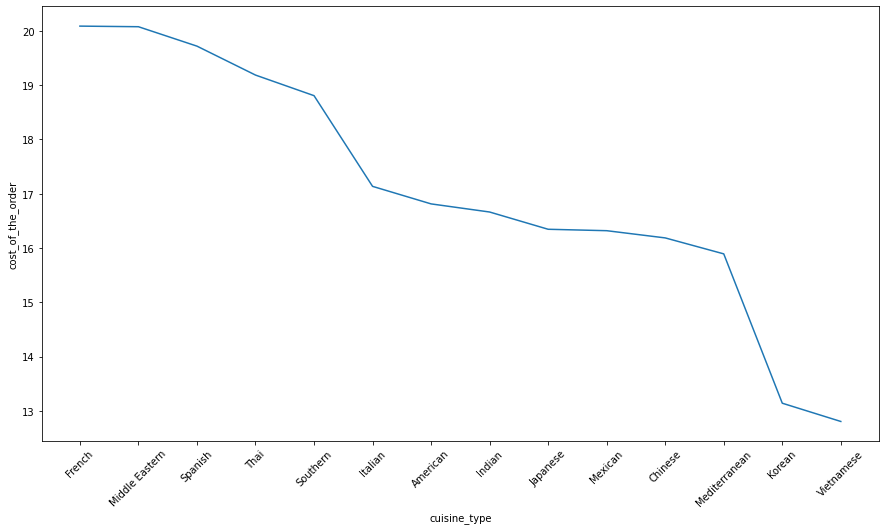

In [ ]:
# determine cost averages by cuisine type for only the orders with a review

cuisine_cost = df_rated.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.lineplot(data=cuisine_cost);
plt.xticks(rotation=45)

#### Cuisine Type and Rating

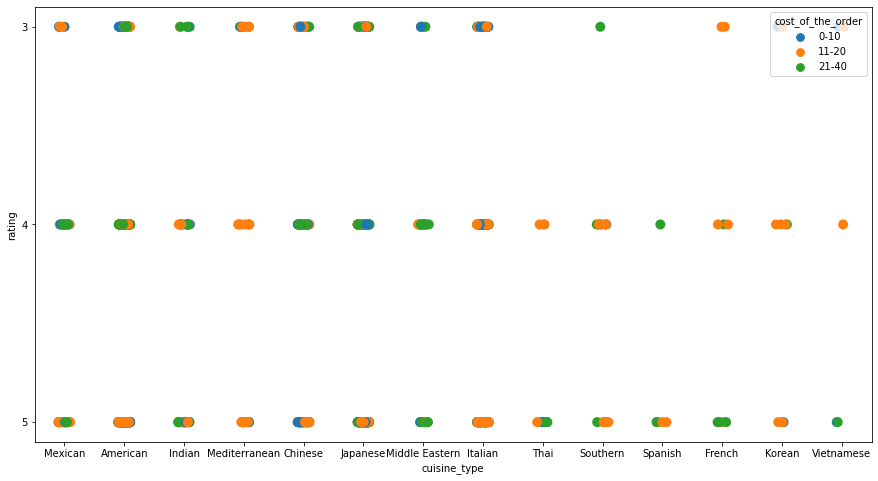

In [ ]:
plt.figure(figsize=(15,8))
sns.stripplot(data=df[df['rating']!='Not given'], x='cuisine_type', y='rating', s=10, hue=pd.cut(df['cost_of_the_order'], bins=[0,10,20,40], labels=['0-10', '11-20', '21-40'], right=True), jitter=True);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

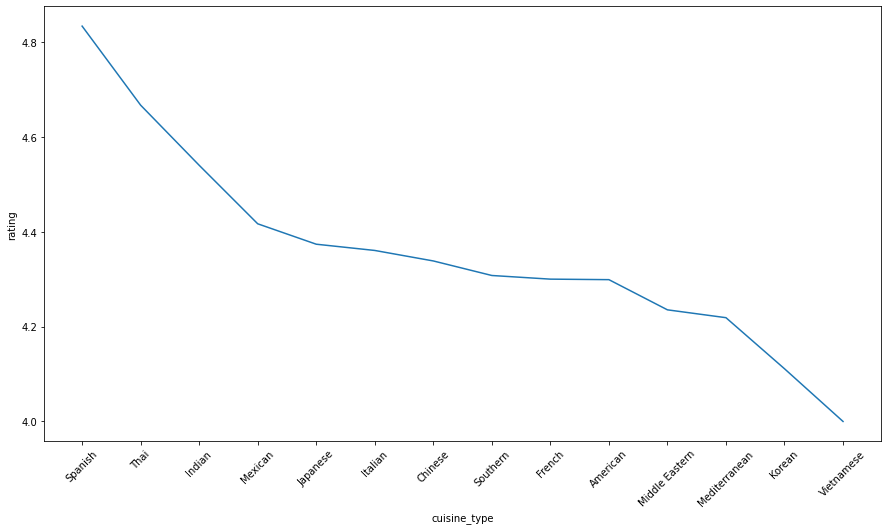

In [ ]:
# Determine average ratings by cuisine type.
cuisine_rating = df_rated.groupby(['cuisine_type'])['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.lineplot(data=cuisine_rating);
plt.xticks(rotation=45)

In [ ]:
# numerical display of average ratings for each cuisine type
cuisine_rating

cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64

In [ ]:
# create a DF with mean cost and mean rating by cuisine type
cuisine_df=pd.DataFrame(cuisine_cost)
cuisine_df['mean_rating']= df_rated.groupby(['cuisine_type'])['rating'].mean()
cuisine_df.reset_index(inplace=True)
cuisine_df.head()

,cuisine_type,cost_of_the_order,mean_rating
0,French,20.087000,4.300000
1,Middle Eastern,20.075882,4.235294
2,Spanish,19.718333,4.833333
3,Thai,19.185556,4.666667
4,Southern,18.806154,4.307692


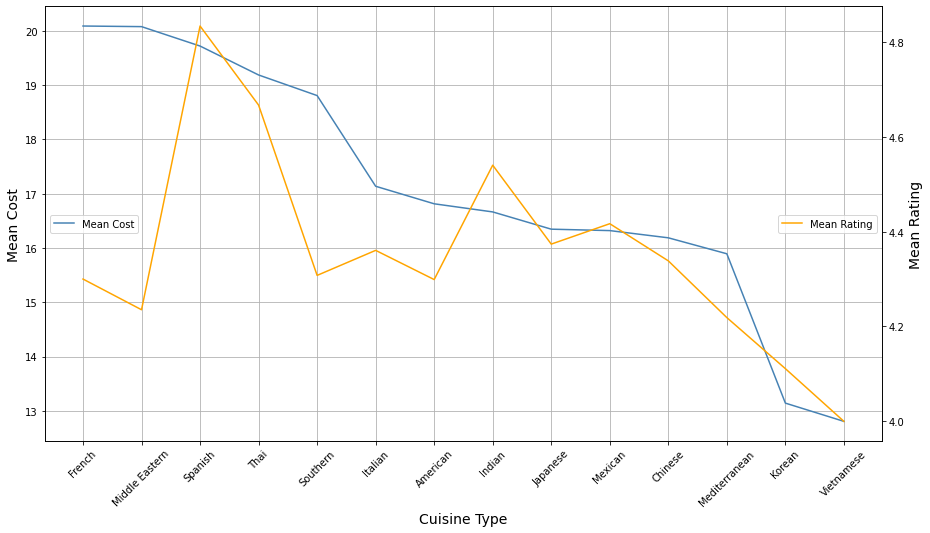

In [ ]:
# compare cost and rating of cuisine types
fig,ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation=45)
plt.grid()

ax.plot(cuisine_df.cuisine_type, cuisine_df.cost_of_the_order, color='steelblue', label='Mean Cost')
ax.set_xlabel('Cuisine Type', fontsize=14)
ax.set_ylabel('Mean Cost', fontsize=14)
ax.legend(loc='center left')

ax2 = ax.twinx()

ax2.plot(cuisine_df.cuisine_type, cuisine_df.mean_rating, color='orange', label = 'Mean Rating')
ax2.set_ylabel('Mean Rating', fontsize=14)
ax2.legend(loc='center right')

#### Wait Time and Rating

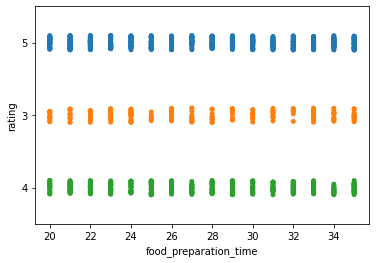

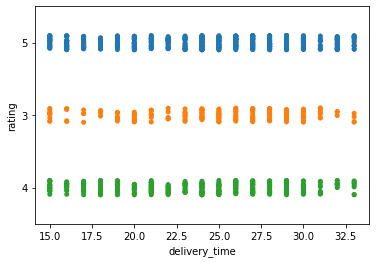

In [ ]:
# see if rating is affected by food prep or delivery time, 'Not given' is excluded
sns.stripplot(data=df[df['rating']!='Not given'], x='food_preparation_time', y='rating', jitter=True);
plt.show()
sns.stripplot(data=df[df['rating']!='Not given'], x='delivery_time', y='rating', jitter=True);

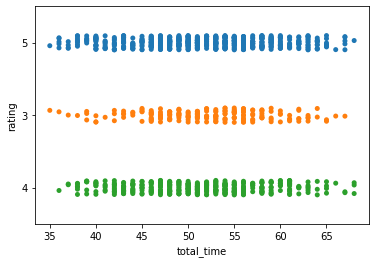

In [ ]:
# distribution of ratings by total_time, 'Not given' is excluded
sns.stripplot(data=df[df['rating']!='Not given'], x='total_time', y='rating')

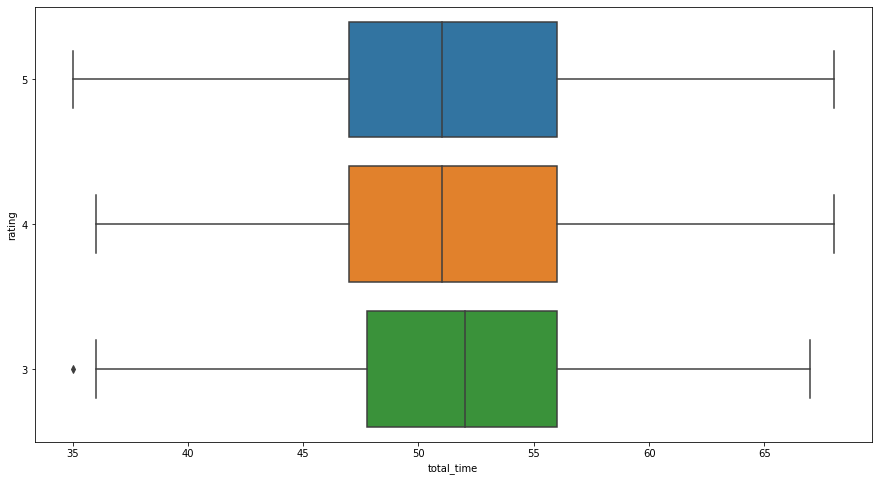

In [ ]:
# boxplots total customer wait time by rating
plt.figure(figsize=(15,8))
sns.boxplot(data=df[df['rating']!='Not given'], x='total_time', y='rating', order=['5','4','3']);

#### Wait Time by Cuisine Type

Text(0.5, 1.0, 'Wait Times by Cuisine')

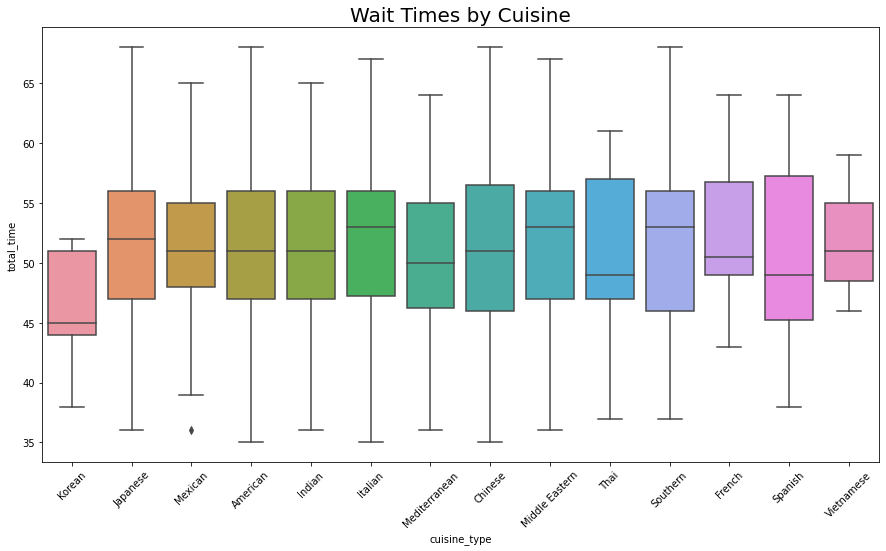

In [ ]:
# compare total wait times by cuisine type
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='cuisine_type', y='total_time');
plt.xticks(rotation=45)
plt.title('Wait Times by Cuisine', fontsize=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

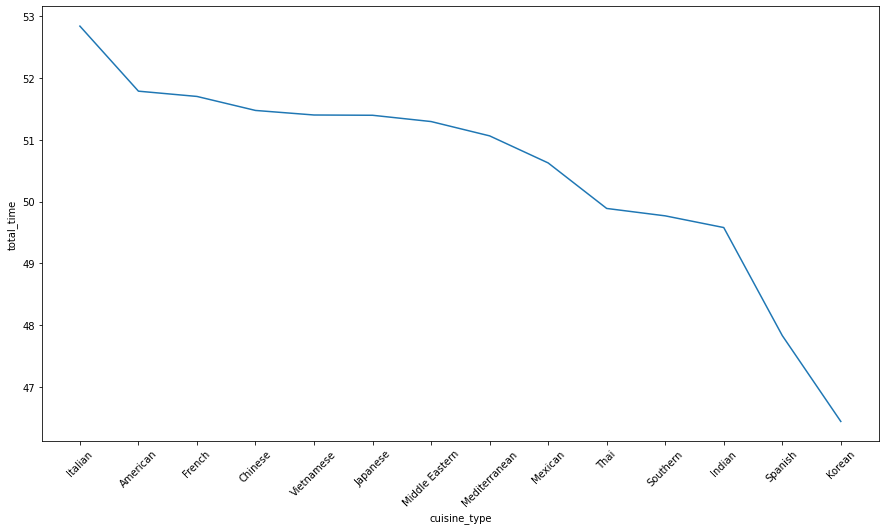

In [ ]:
cuisine_rating = df_rated.groupby(['cuisine_type'])['total_time'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.lineplot(data=cuisine_rating);
plt.xticks(rotation=45)

#### Observations:
There appears to be very little correlation between any of the numerical parameters. The one exception is a 42 percent correlation between cost and food preparation time, indicating that more expensive meals take longer to prepare. This makes sense as the more expensive orders are probably larger and it takes longer to prepare more food. 
 
American and Japanese are the most popular cuisine types and have costs to orders that are right skewed.  The largest range in both cuisine types are around 12 dollars per order. Vietnamese had the lowest cost orders as a whole.

Ratings by Cuisine Type shows us that Spanish is the highest mean rating at 4.83 and Vietnamese has the lowest mean rating of 4.0.

Cuisine types all have a similar distribution range in the cost per order, American and Japanese just have a much higher concentration between 10 and 15 dollars whereas the bottom few cuisine types have flat distributions with low numbers of total orders. 

Comparing cuisine types cost and rating, we see there is a mix of rating to cost in the more expensive cuisines but the lower cost cuisine types do correlate to lower rating.

When checking for correlation between the time a customer waits for their food and the rating they give the order, all three rating categories, 3,4,5 stars, all have roughly the same distribution. This rating distribution matches the overall distribution of total wait times. This tells us that wait times do not appreciably affect the rating.  Therefore, we can infer that the quality of the food is the main driving factor for ratings.

Wait times by Cuisine are all similar with Korean generally taking the least amount of time(46 mins) and Italian(53) has the longest median wait time.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# double check the total number of orders with a rating
df[df['rating']!='Not given'].value_counts().sum()

1162

In [ ]:
# groupby to determing number of ratings for each restaurant name.
df_rated_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rated_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# call only the restaurants with >50 ratings and find mean rating.
promo50 = df_rated_count[df_rated_count['rating']>50]['restaurant_name']

promo50_4 = df_rated[df_rated['restaurant_name'].isin(promo50)].copy()
promo50_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

**The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi** qualify for the advertising promotional offer because they all have more than 50 reviews and an average review rating greater than 4.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# calclulate revenue on orders more than 20 dollars
df20 = df[df['cost_of_the_order']>20]
rev20 =df20['cost_of_the_order'].sum() * .25
rev20

3688.7275

In [ ]:
# Determine if there are any orders less than 5 dollars
df[df['cost_of_the_order']<=5].shape
# there are 9 we will not calculate revenue for

(9, 10)

In [ ]:
df[df['cost_of_the_order']<=5]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28,63
390,1477196,50123,Cafe Habana,Mexican,4.85,Weekend,5,28,22,50
480,1476877,53289,The Loop,Japanese,4.66,Weekend,Not given,34,25,59
542,1477788,270444,P.J. Clarke's,American,4.71,Weekend,Not given,23,15,38
624,1477349,52327,Nobu Next Door,Japanese,4.47,Weekend,5,28,26,54
664,1476909,366975,Blue Ribbon Sushi Bar & Grill,Japanese,4.85,Weekend,5,20,21,41
889,1477787,14869,Shake Shack,American,4.80,Weekend,4,22,24,46
1569,1477786,145389,RedFarm Hudson,Chinese,4.75,Weekend,3,23,25,48
1695,1478302,318665,Blue Ribbon Sushi Bar & Grill,Japanese,4.90,Weekday,4,29,32,61


In [ ]:
# calculate revenue on orders greater than 5 and less than or equal to 20 dollars
df_ue20 = df[df['cost_of_the_order']<=20]
df_ue20

df5 = df_ue20[df_ue20['cost_of_the_order']>5]
rev5 = df5['cost_of_the_order'].sum() * .15
rev5

2477.5755000000004

In [ ]:
# calculate total revenue
total_rev = rev20 + rev5
print('The total Revenue for the period is:', format(total_rev,'.2f'), 'dollars.')

The total Revenue for the period is: 6166.30 dollars.


#### Create a function to add a revenue column and calculte total revenue

In [ ]:
# solution from GL was to use a function

# def compute_rev(x):
#   if x > 20:
#     return x*0.25
#   elif x > 5:
#     return x*0.15
#   else:
#     return x*0

#   df['revenue'] = df['cost_of_order'].apply(compute_rev)

In [ ]:
# total_rev = df['reveue'].sum()
# print('The total revenue for the period was', total_rev, '.')

#### Observations:
The total revenue for the period is 6166.30 dollars.

9 orders were less than or equal to 5 dollars and thus not included in the revenue calculation.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#total_time was calculated previously and added as a column to df
wait60= df[df['total_time']>60]
print(format(wait60.shape[0]/df.shape[0]*100,'.2f'),
      '% of orders take longer than 60 minutes from order to delivery.')

10.54 % of orders take longer than 60 minutes from order to delivery.


#### Observations:
10.54% of the orders take longer than 60 miutes from the time the order is placed until the order is delivered.

(see multivariate analysis, question 12 for the creation of total_time column adding the food prep time and delivery time)

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Text(0.5, 1.0, 'Delivery Times Weekend vs Weekday')

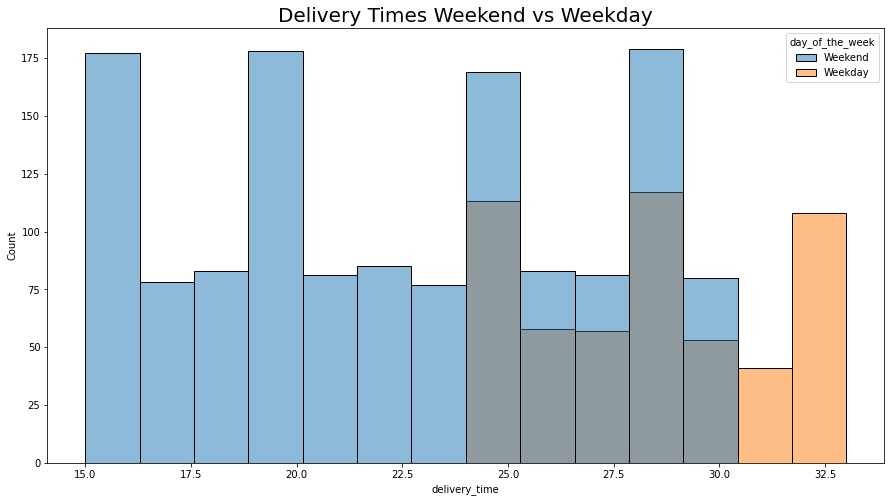

In [ ]:
# Distribution of delivery times by Weekday vs Weekend
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='delivery_time', hue='day_of_the_week');
plt.title('Delivery Times Weekend vs Weekday', fontsize=20)

In [ ]:
# calculate mean delivery time on weekdays and weekends
print('The mean delivery time on Weekdays is', int(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()), 'minutes.\n')
print('The mean delivery time on Weekends is', int(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()), 'minutes.')

The mean delivery time on Weekdays is 28 minutes.

The mean delivery time on Weekends is 22 minutes.


#### Observations:
Mean delivery time on weekdays is 6 minutes longer than weekends. 

28 minutes on weekdays

22 minutes on weekends

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
 65% of customers use the service one time. 75% have used the service only once or twice. 35% of customers are repeat customers and they account for 59% of the orders.


 The highest concentration of order costs is between 11 and 12 dollars. This indicates these are probably orders for one person.  Only 29% of orders cost more than 20 dollars.


 Food prep time is between 20 and 35 minutes with an even, multi-modal distribution. The mean and median are both about 27 minutes.


 Delivery time is between 15 and 33 minutes with 50% of orders taking between 20-28 minutes to deliver. Delivery times are shorter on the weekends with a mean of 22 minutes vs. a weekday delivery time mean of 28 minutes. This is probably due to higher traffic volumes during the work week.

Additionally, 71% of orders are placed on the weekend. Prople may desire to leave their office during the work day and eat out, whereas on the weekends they are more prone to use Food Hub to order food in at home. 


 There are currently 178 restaurants using the service.
 The top five restaurants by number of orders, overall, are:
- Shake Shack
- The Meatball Shop
- Blue Ribbon Sushi
- Blue Ribbon Fried Chicken
- Parm

 Cuisine popularity- American and Japanese are the most popular cuisine types. American alone accounts for 30% of weekend orders, while American and Japanese combied account for 56% of the weekend orders. 


 Ratings- 39% of the orders had no rating given. Of the orders that were rated, the distribution is as follows:
- 5 Stars: 51%
- 4 Stars: 33%
- 3 Stars: 16%

Spanish has the highest average rating at 4.83, while Vietnames has the lowest average rating at 4.0.

The cuisines with lower average costs have lower average ratings.


 Advertising Promotion:

 There are four restaurants that qualify for the promoton, having greater than 50 reviews and an average rating greater than 4. They are:

- The Meatball Shop
- Blue Ribbon Fried Chicken
- Shake Shack
- Blue Ribbon Sushi

During this period, revenue from orders as 6166.30, with 2477.58 coming from orders between 5 and 20 dollars. $3688.72 is from orders costing greater than 20 dollars.

There were nine orders with costs less than 5 dollars, and thus generated no revenue for Food Hub. Most of these under 5 orders were Japanse and American, which also happen to be the most popular cuisine types. 

Total wait times, combining food prep time and deliver time, have a similar distribution across cuisine types. Italian has the longest mean wait time of 53 minutes. The shortes average wait time is Korean at 46 minutes.

There seems to be no correlation between wait time and rating. Food quality is probably the driving factor for ratings.

10.54% of orders had a wait time of greater than 60 minutes.

### Recommendations:

- Find ways to increase the number of repeat customers.
- Increase orders to multiple people, this will increase overall order cost and revenue. The revenue to delivery ratio will improve.
- Weekends are naturally more popular, so increasing orders on weekends should be easier than weekdays. Increase marketing towards in-home weekend meals.
- Market towards in-office lunch deliveries to increase weekday orders.
- Drop Vietnamese and Korean cuisines, or at least, do not work to recruit more restaurants of this type. They have the lowest order costs, lowest poplarity, and lowest ratings.
- Increase American and Japanese restaurant recruitment. 
- Exercise the advertising promotion to reward the best restaurants and drive up orders. This is mutually beneficial and in good business order and standing.
- Set an order limit of 5 dollars to avoid non-revenue producing orders.


---